## Importing libraries

In [1]:
import quandl
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import statsmodels.api as sm # Using .api imports the public access version of statsmodels, which is a library that handles 
# statistical models.
import os
import warnings # This is a library that handles warnings.

warnings.filterwarnings("ignore") # Disable deprecation warnings that could indicate, for instance, a suspended library or 
# feature. These are more relevant to developers and very seldom to analysts.

plt.style.use('fivethirtyeight') # This is a styling option for how your plots will appear. More examples here:
# https://matplotlib.org/3.2.1/tutorials/introductory/customizing.html
# https://matplotlib.org/3.1.0/gallery/style_sheets/fivethirtyeight.html

## Data loading

In [3]:
# Configure API key 

quandl.ApiConfig.api_key = 'cgBs8QSF5hAxNHS1jg8x'

In [10]:
# Importing the inflation rate for Germany, Italy, France and Switzerland.

deu = quandl.get('RATEINF/INFLATION_DEU', start_date="1960-01-01", end_date="2021-12-31")
ita = quandl.get('RATEINF/INFLATION_ITA', start_date="1960-01-01", end_date="2021-12-31")
fra = quandl.get('RATEINF/INFLATION_FRA', start_date="1960-01-01", end_date="2021-12-31")
sui = quandl.get('RATEINF/INFLATION_CHE', start_date="1960-01-01", end_date="2021-12-31")


In [5]:
deu.head(5)

,Value
Date,
1992-01-31,5.7
1992-02-29,5.8
1992-03-31,6.2
1992-04-30,6.2
1992-05-31,6.2


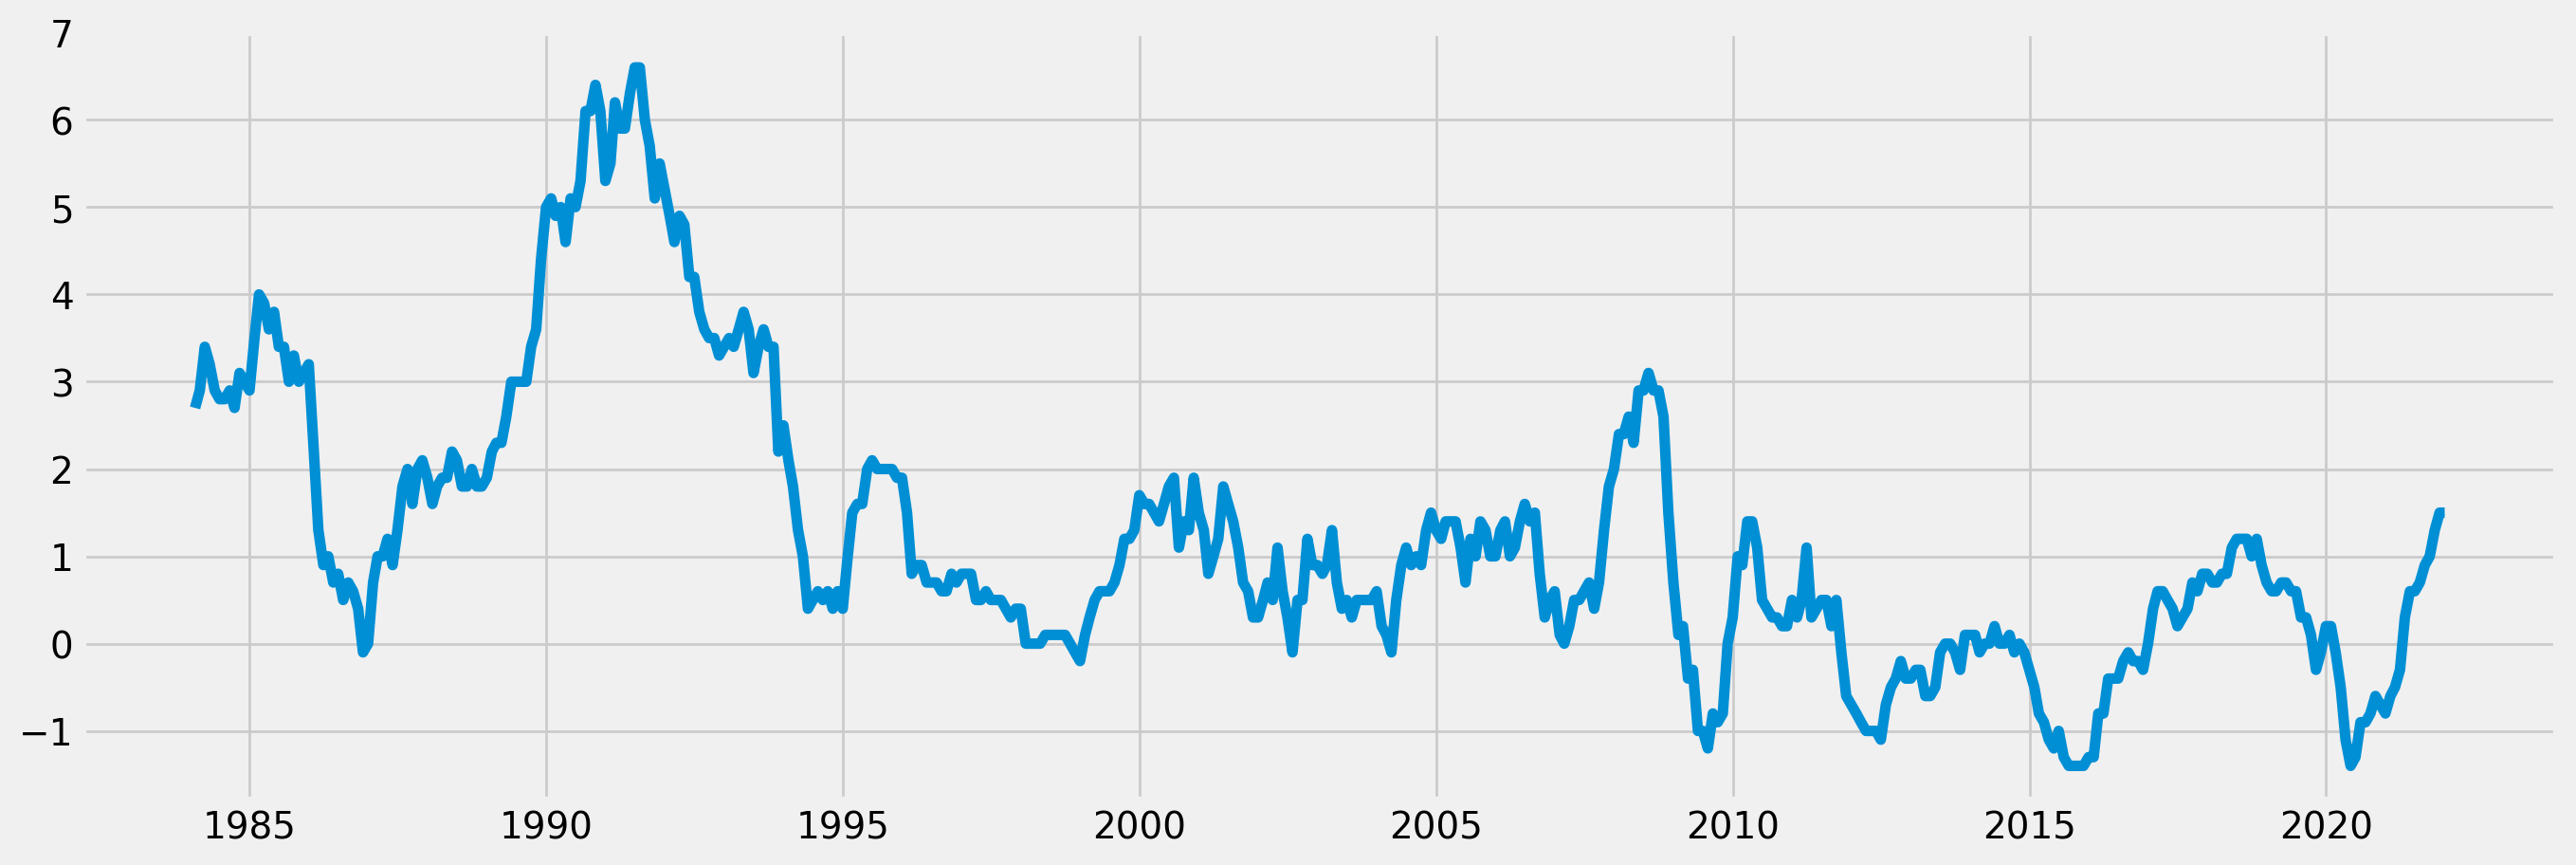

In [15]:
# Plot the data using matplotlib.

plt.figure(figsize=(15,5), dpi=200) # The dpi argument controls the quality of the visualization here. When it's set to 100,
# it will produce lower-than-standard quality, which is useful if, similar to this notebook, you'll have a lot of plots.
# A large number of plots will increase the size of the notebook, which could take more time to load and eat up a lot of RAM!

plt.plot(sui)

## Subsetting, wrangling, and cleaning time-series data

In [20]:
# reset index to use the "Date" column as a filter

deu2 = deu.reset_index()
ita2 = ita.reset_index()
fra2 = fra.reset_index()
sui2 = sui.reset_index()

In [25]:
sui2.isnull().sum()

Date     0
Value    0
dtype: int64

In [26]:
sui2.duplicated().sum()

0

## Time-series analysis: Decomposition

In [40]:
# Decompose the time series using an additive model

decomposition = sm.tsa.seasonal_decompose(deu, model='additive')

In [33]:
from pylab import rcParams # This will define a fixed size for all special charts.

rcParams['figure.figsize'] = 18, 7

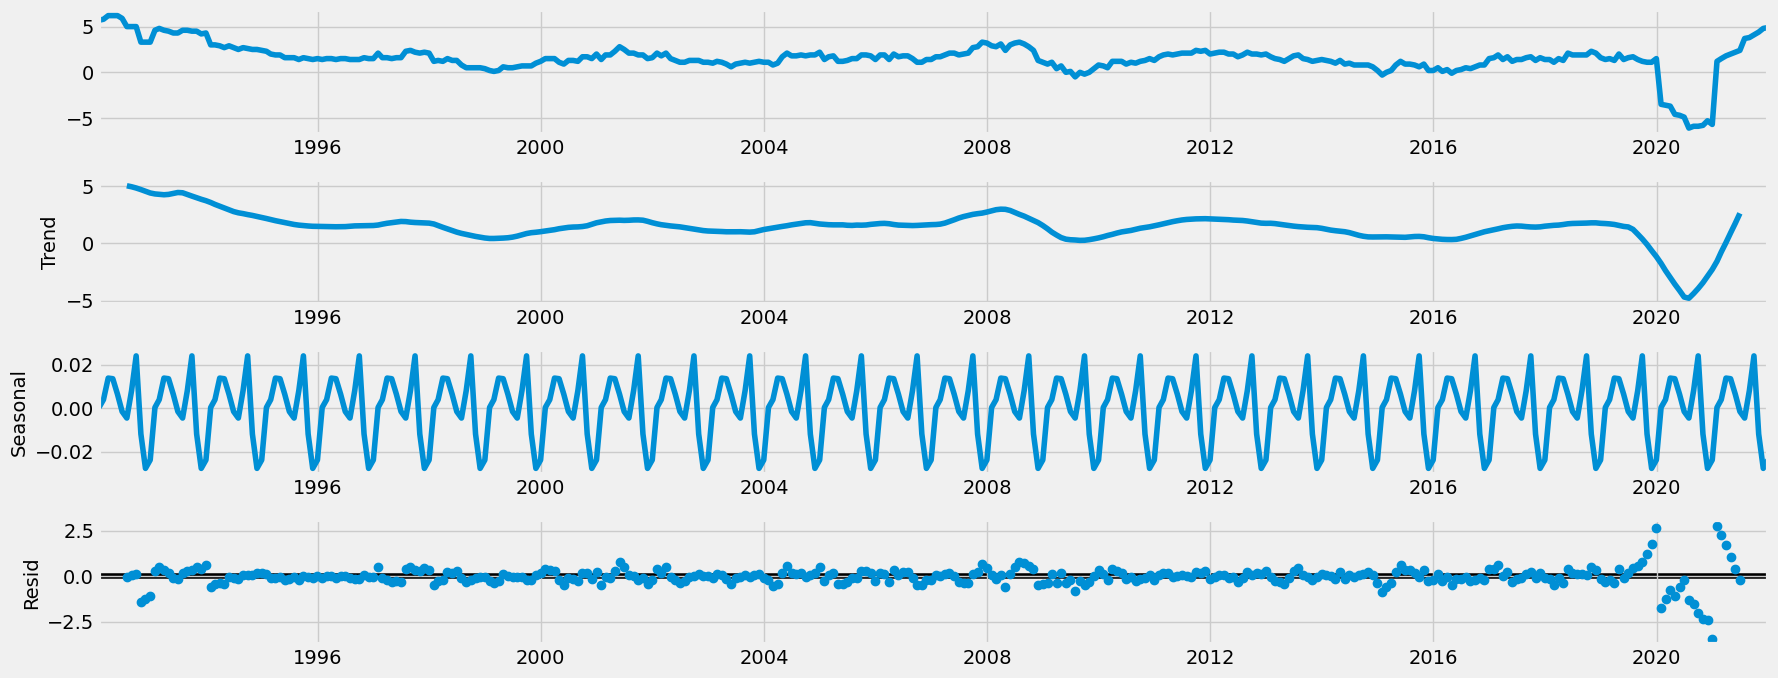

In [41]:
decomposition.plot()
plt.show()

### I am not sure whether the Trend component here represents a downward trend or no trend. The reason for the downward trend is that the inflation rate was never as high as it was in 1993. Therefore, looking at the bigger picture, the trend line could be directed downward, but with a very low slope. On the other hand, the reason for no trend is that there is no clear direction evident in the trend line.

### The component of Seasonality here is very clear. At the beginning of the year, the inflation rate is at its lowest. It rises until the middle of the year, drops somewhere in October-November, and peaks during December.

### Except during the covid pandemic, when the inflation rate dropped to its lowest in the last 30 years due to decrease in economic activities, the time-series does not have any unexplained Noise.

## Testing for stationarity

In [36]:
# The adfuller() function will import from the model from statsmodels for the test; however, running it will only return 
# an array of numbers. This is why you need to also define a function that prints the correct output from that array.

from statsmodels.tsa.stattools import adfuller # Import the adfuller() function

def dickey_fuller(timeseries): # Define the function
    # Perform the Dickey-Fuller test:
    print ('Dickey-Fuller Stationarity test:')
    test = adfuller(timeseries, autolag='AIC')
    result = pd.Series(test[0:4], index=['Test Statistic','p-value','Number of Lags Used','Number of Observations Used'])
    for key,value in test[4].items():
       result['Critical Value (%s)'%key] = value
    print (result)

# Apply the test using the function on the time series
dickey_fuller(deu['Value'])

Dickey-Fuller Stationarity test:
Test Statistic                  -3.133291
p-value                          0.024186
Number of Lags Used             12.000000
Number of Observations Used    347.000000
Critical Value (1%)             -3.449337
Critical Value (5%)             -2.869906
Critical Value (10%)            -2.571227
dtype: float64


### With "Test Statistic" being smaller than "Critical Value (5%), the null hypothesis is rejected which means that the time-series data does not contain unit root and that data is stationary.

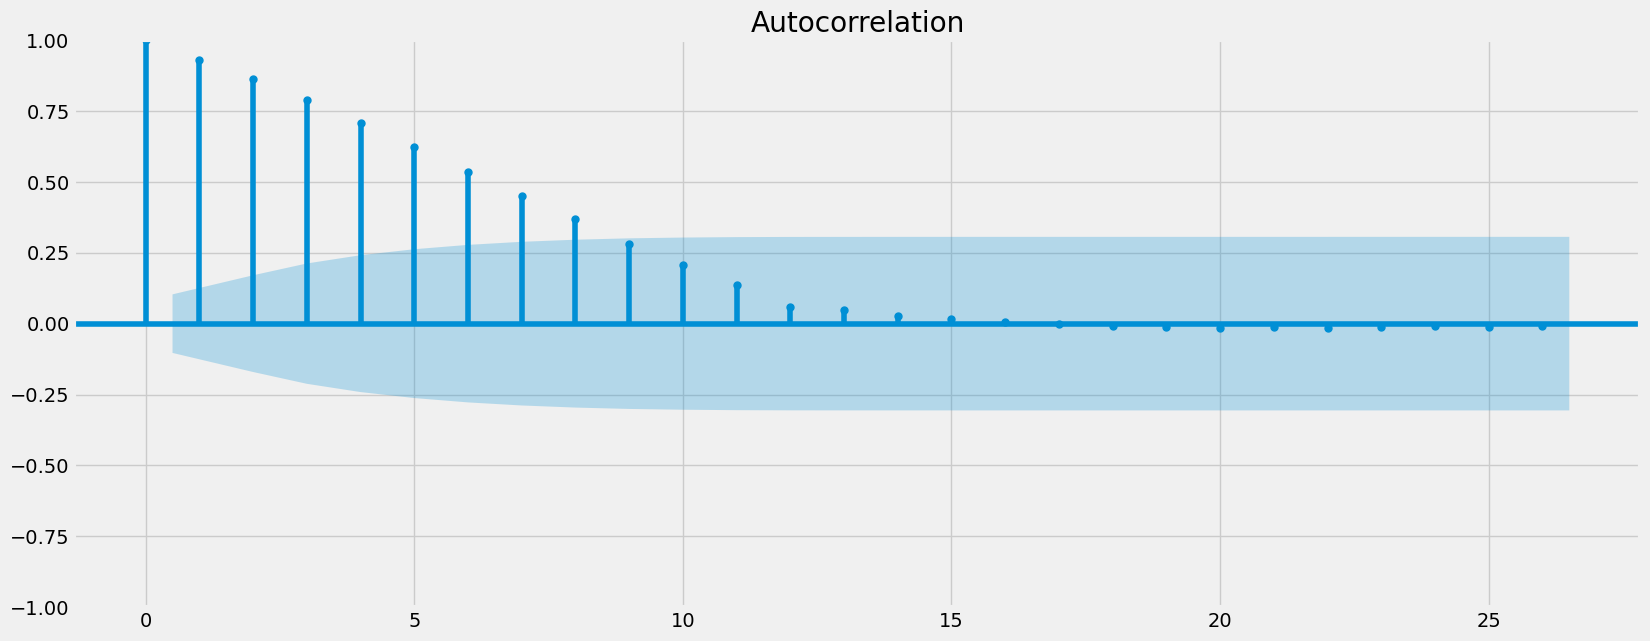

In [37]:
# Check out a plot of autocorrelations

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf # Here, you import the autocorrelation and partial correlation plots

plot_acf(deu)
plt.show()

### As more lags are inside of the confidence interval than they are outside of the confidence interval, this time-series data is stationary.